In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [2]:
data = pd.read_json('logins.json')

In [3]:
data.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  93142 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [5]:
# data['login_time'] = pd.to_datetime(data['login_time'])

In [6]:
data.describe(datetime_is_numeric=True)

,login_time
count,93142
mean,1970-02-26 19:09:39.779648247
min,1970-01-01 20:12:16
25%,1970-02-04 10:37:19.750000
50%,1970-03-01 06:33:05.500000
75%,1970-03-22 04:01:10.750000
max,1970-04-13 18:57:38


Our data lies in the interval 1970-01-01 to 1970-04-13.

In [7]:
data.isna().sum()

login_time    0
dtype: int64

There are no missing values.

In [8]:
data_15 = data.resample('15T', on = 'login_time').count()

In [9]:
data_15.head()

,login_time
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


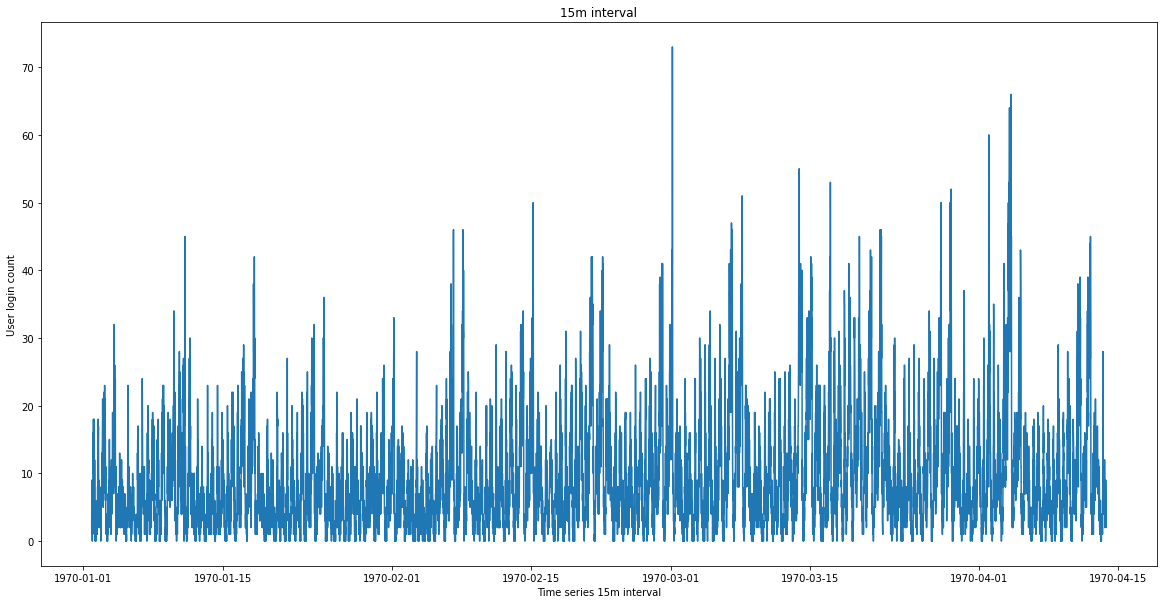

In [10]:
plt.figure(figsize=(20, 10))
plt.plot(data_15)
plt.title('15m interval')
plt.xlabel('Time series 15m interval')
plt.ylabel('User login count')
plt.show()

There appears to be a clear cyclical pattern but it is difficult to interpret with so much data.  We can see that there is a huge spike in user login count at the start of March.  Let's look at different time intervals to understand the trends more clearly.

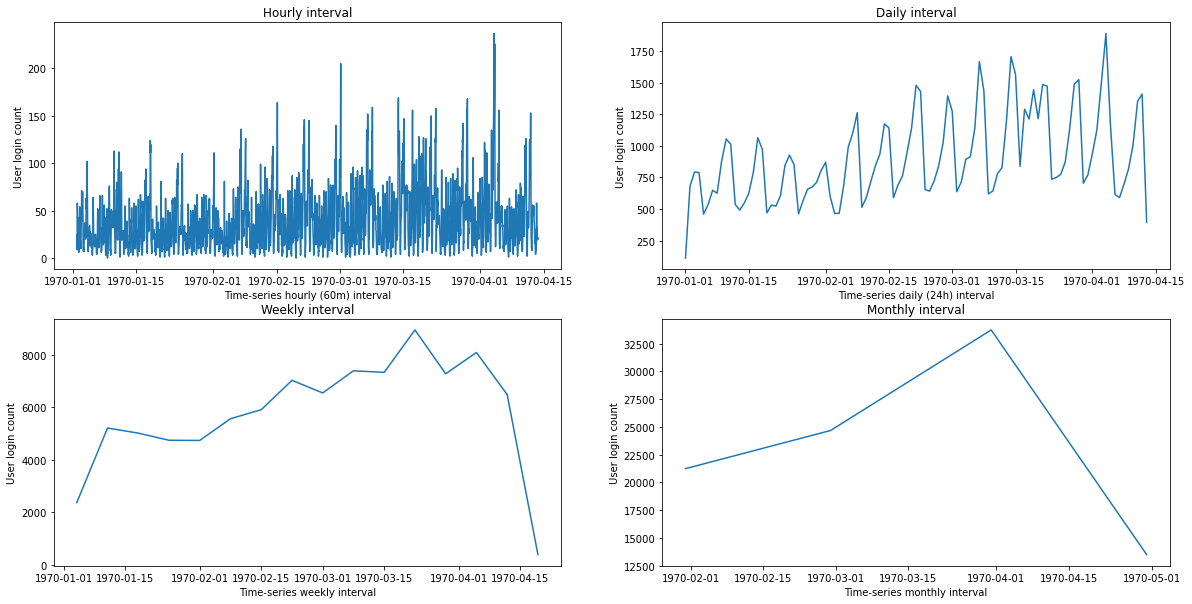

In [11]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize = (20, 10));

# 60-min interval
ax1.plot(data.resample('H', on = 'login_time').count());
ax1.set(xlabel='Time-series hourly (60m) interval', ylabel='User login count', title='Hourly interval');

# Daily interval
ax2.plot(data.resample('D', on = 'login_time').count());
ax2.set(xlabel='Time-series daily (24h) interval', ylabel='User login count', title='Daily interval');

# Weekly interval
ax3.plot(data.resample('W', on = 'login_time').count());
ax3.set(xlabel='Time-series weekly interval', ylabel='User login count', title='Weekly interval');

# Monthly interval
ax4.plot(data.resample('M', on = 'login_time').count());
ax4.set(xlabel='Time-series monthly interval', ylabel='User login count', title='Monthly interval');

From the hourly interval plot, we can see that there are clear cyclical patterns but there is still too much data to get a clear picture.  We will look at a smaller range of hourly data to get a better picture.

From the daily interval plot, we can see that there are clear patterns cyclical patterns between days (this may be related to weekdays vs. weekends).  We can future investigate this hypothesis by zooming into a particular week.

The weekly interval plot shows us that the general trend is upwards between January and March and a sharp decline hits at a beginning of April.

The monthly interval plot provides a smoother picture of the trend we noticed in the weekly interval plot.

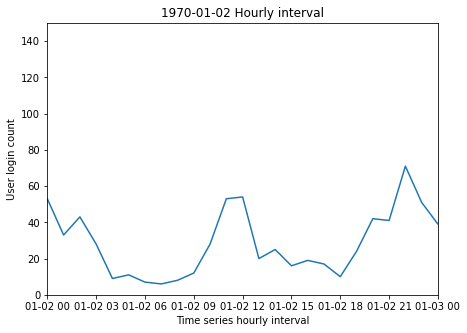

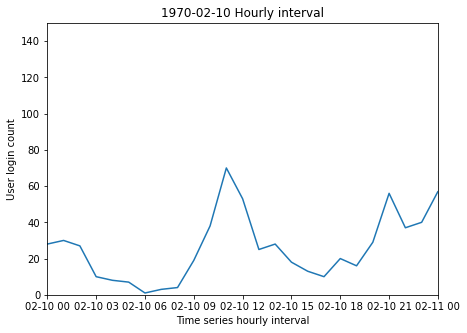

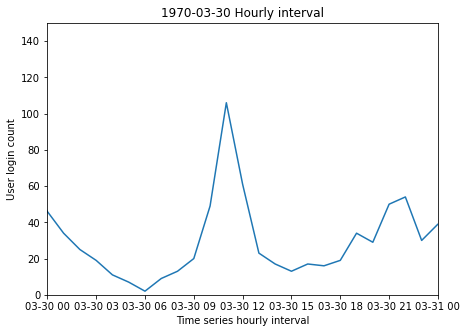

In [12]:
#Look at hourly data over the period of 1 day (pick 3 random days)

plt.figure(figsize=(7, 5))
plt.title('1970-01-02 Hourly interval')
plt.plot(data.resample('H', on = 'login_time').count())
plt.xlim([datetime.date(1970, 1, 2), datetime.date(1970, 1, 3)])
plt.ylim(0, 150)
plt.xlabel('Time series hourly interval')
plt.ylabel('User login count')
plt.show()

plt.figure(figsize=(7, 5))
plt.title('1970-02-10 Hourly interval')
plt.plot(data.resample('H', on = 'login_time').count())
plt.xlim([datetime.date(1970, 2, 10), datetime.date(1970, 2, 11)])
plt.ylim(0, 150)
plt.xlabel('Time series hourly interval')
plt.ylabel('User login count')


plt.show()

plt.figure(figsize=(7, 5))
plt.title('1970-03-30 Hourly interval')
plt.plot(data.resample('H', on = 'login_time').count())
plt.xlim([datetime.date(1970, 3, 30), datetime.date(1970, 3, 31)])
plt.ylim(0, 150)
plt.xlabel('Time series hourly interval')
plt.ylabel('User login count')
plt.show()

From the three daily plots above, it is evident that there are spikes in user login activity between 9am - 12pm and 6pm - 12am. 

In [13]:
# Look at daily data over a week (pick 3 random weeks)
datetime.date(1970,1,2).weekday()

4

In [14]:
datetime.date(1970,2,10).weekday()

1

In [15]:
datetime.date(1970,3,30).weekday()

0

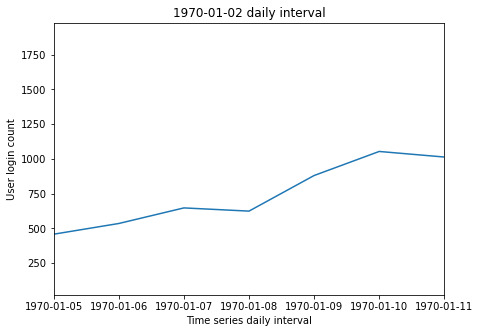

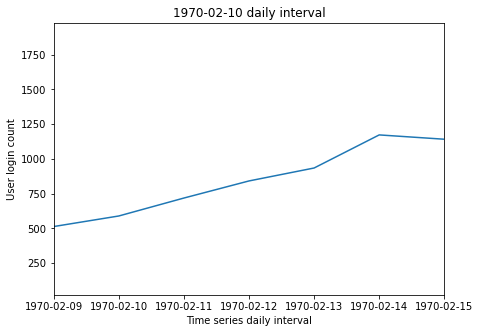

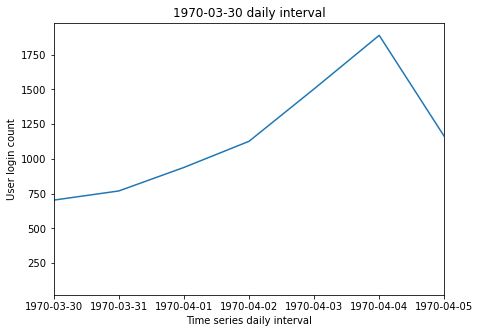

In [16]:
# Week of 1970-01-05
plt.figure(figsize=(7, 5))
plt.title('1970-01-02 daily interval')
plt.plot(data.resample('D', on = 'login_time').count())
plt.xlim([datetime.date(1970, 1, 5), datetime.date(1970, 1, 11)])
plt.xlabel('Time series daily interval')
plt.ylabel('User login count')
plt.show()

# Week of 1970-02-09
plt.figure(figsize=(7, 5))
plt.title('1970-02-10 daily interval')
plt.plot(data.resample('D', on = 'login_time').count())
plt.xlim([datetime.date(1970, 2, 9), datetime.date(1970, 2, 15)])
plt.xlabel('Time series daily interval')
plt.ylabel('User login count')
plt.show()

# Week of 1970-03-30
plt.figure(figsize=(7, 5))
plt.title('1970-03-30 daily interval')
plt.plot(data.resample('D', on = 'login_time').count())
plt.xlim([datetime.date(1970, 3, 30), datetime.date(1970, 4, 5)])
plt.xlabel('Time series daily interval')
plt.ylabel('User login count')
plt.show()

Based on the above plots, we can see that user login count gradually increases throughout the week and reaches the peak on Saturdays.